Epoch 1/100
62/62 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.6401
Epoch 2/100
62/62 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.6401
Epoch 3/100
62/62 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.6401
Epoch 4/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5487 - accuracy: 0.6417
Epoch 5/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5274 - accuracy: 0.7394
Epoch 6/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.7671
Epoch 7/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5006 - accuracy: 0.7557
Epoch 8/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4901 - accuracy: 0.7606
Epoch 9/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.7720
Epoch 10/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7752
Epoch 11/

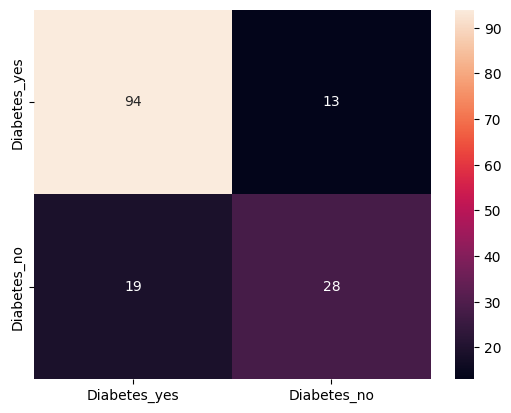

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Load the dataset
dataset = pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the ANN
classifier = tf.keras.Sequential([
    tf.keras.layers.Dense(units=8, activation='relu', kernel_initializer='uniform', input_dim=8),
    tf.keras.layers.Dense(units=8, kernel_initializer='uniform', activation='relu'),
    tf.keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid')
])

# Compile the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

# Make Predictions
y_pred = (classifier.predict(X_test) > 0.5)

# Create a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix
sns.heatmap(cm, fmt=".0f", xticklabels=['Diabetes_yes', 'Diabetes_no'],
            yticklabels=['Diabetes_yes', 'Diabetes_no'], annot=True)

# Predict a New Data Point
new_data = np.array([[1, 97, 64, 0, 0, 25.6, 0.201, 30]])
new_data = sc.transform(new_data)
outcome = classifier.predict(new_data)
print("The Outcome of the Patient is:", "Diabetes" if outcome > 0.5 else "No Diabetes")

# Calculate Performance Metrics
TP, FP, FN, TN = cm.ravel()
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
PPV = TP / (TP + FP)
NPV = TN / (TN + FN)
FPR = FP / (FP + TN)
FNR = FN / (TP + FN)
FDR = FP / (TP + FP)
ACC = (TP + TN) / (TP + FP + FN + TN)

print("Recall:", TPR)
print("Specificity:", TNR)
print("Precision:", PPV)
print("Negative Predictive Value:", NPV)
print("False Positive Rate:", FPR)
print("False Negative Rate:", FNR)
print("False Discovery Rate:", FDR)
print("Accuracy:", ACC)
